In [2]:
%pylab inline

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import sqlite3
import pandas as pd

import utilities as util

Populating the interactive namespace from numpy and matplotlib


# Load data

In [3]:
filename = '../data/mountain_project_gunks.sqlite'
conn = sqlite3.connect(filename)

# Climber profiles
df_users = pd.read_sql('SELECT * FROM users', conn)

# Route data
df_items = pd.read_sql("""
SELECT items.*, pro.pro_type
FROM items JOIN pro 
ON items.pro_id = pro.id
""", conn)

# Ratings of each route
df_ratings = pd.read_sql('SELECT * FROM ratings', conn)

In [5]:
df_users.shape, df_items.shape, df_ratings.shape

((2432, 4), (470, 12), (31431, 3))

In [16]:
display(df_users.sample(3).style.format(util.make_clickable, subset=['user_url']))
display(df_items.sample(3).drop('description', axis=1).style.format(util.make_clickable, subset=['route_url']))
display(df_ratings.sample(3))

,uid,name,user_url,profile
1664,1664,DickBerg,https://www.mountainproject.com/user/112354380/dickberg,Vancouver
788,788,John Peterson,https://www.mountainproject.com/user/11926/john-peterson,63 years old Male
852,852,Rob Angelora,https://www.mountainproject.com/user/111203516/rob-angelora,None


,iid,route_name,route_url,difficulty,pro_id,length,pitches,nratings,monthly_views,total_views,pro_type
94,94,Scungilli,https://www.mountainproject.com/route/109021363/scungilli,5.7,1,180,2,6,11,629,Trad
254,254,Country Roads,https://www.mountainproject.com/route/106853208/country-roads,5.11b,1,210,2,9,15,1545,Trad
241,241,Wild Horses,https://www.mountainproject.com/route/106146799/wild-horses,5.9+,1,170,2,42,16,2126,Trad


,uid,iid,rating
26822,2328,329,2
18332,584,230,2
2898,295,35,2


# Plot distributions

2432.0


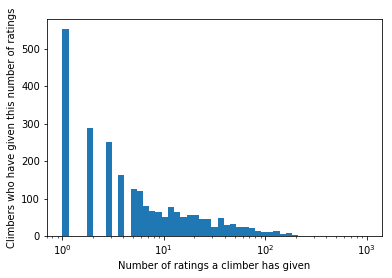

In [7]:
grouped = df_ratings.groupby('uid')
ratings_per_climber = grouped.size().values

fig, ax = plt.subplots()
counts, bins, _ = ax.hist(ratings_per_climber, bins=np.logspace(0, 3, 50))
ax.set_xscale('log')
ax.set_xlabel('Number of ratings a climber has given')
ax.set_ylabel('Climbers who have given this number of ratings')
print np.sum(counts)

469.0

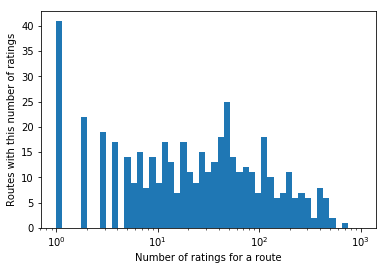

In [8]:
grouped = df_ratings.groupby('iid')
ratings_per_route = grouped.size().values

fig, ax = plt.subplots()
counts, _, _ = ax.hist(ratings_per_route, bins=np.logspace(0, 3, 50))
ax.set_xscale('log')
ax.set_xlabel('Number of ratings for a route')
ax.set_ylabel('Routes with this number of ratings')
np.sum(counts)

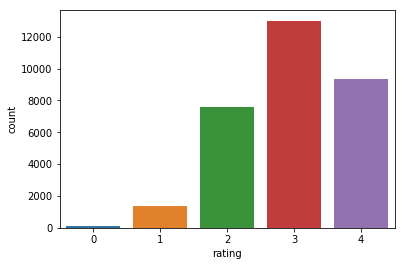

In [9]:
sns.countplot(x='rating', data=df_ratings)

Text(0,0.5,'Climbers who have given this number of ratings')

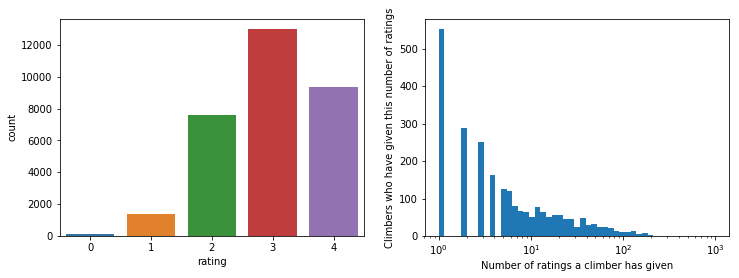

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='rating', data=df_ratings, ax=ax1)

grouped = df_ratings.groupby('uid')
ratings_per_climber = grouped.size().values

counts, bins, _ = ax2.hist(ratings_per_climber, bins=np.logspace(0, 3, 50))
ax2.set_xscale('log')
ax2.set_xlabel('Number of ratings a climber has given')
ax2.set_ylabel('Climbers who have given this number of ratings')